In [2]:
import pandas as pd
from ydata_profiling import ProfileReport

import seaborn as sns
sns.set
import matplotlib.pyplot as plt

import numpy as np

import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

import lightgbm as lgb

In [22]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [70]:
df = pd.read_csv("data/housing.csv")
df = df[["Lot Area", "Overall Qual", "Overall Cond", "Year Built", "Total Bsmt SF", '1st Flr SF', '2nd Flr SF', 'Fireplaces', 'Garage Cars', 'Open Porch SF', 'SalePrice']]

cols_to_remove = []
info = df.dtypes
print(type(info))
for col in df.columns:
    if df[col].dtype == 'object':
        cols_to_remove.append(col)

print(len(cols_to_remove))

# df = df[[col for col in df.columns if col not in cols_to_remove]]
df.head()

<class 'pandas.core.series.Series'>
0


,Lot Area,Overall Qual,Overall Cond,Year Built,Total Bsmt SF,1st Flr SF,2nd Flr SF,Fireplaces,Garage Cars,Open Porch SF,SalePrice
0,31770,6,5,1960,1080.0,1656,0,2,2.0,62,215000
1,11622,5,6,1961,882.0,896,0,0,1.0,0,105000
2,14267,6,6,1958,1329.0,1329,0,0,1.0,36,172000
3,11160,7,5,1968,2110.0,2110,0,2,2.0,0,244000
4,13830,5,5,1997,928.0,928,701,1,2.0,34,189900


In [71]:
df = pd.read_csv("data/housing.csv")
df.columns

Index(['Unnamed: 0', 'Order', 'PID', 'MS SubClass', 'MS Zoning',
       'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'G

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2930 non-null   int64  
 1   Order            2930 non-null   int64  
 2   PID              2930 non-null   int64  
 3   MS SubClass      2930 non-null   int64  
 4   MS Zoning        2930 non-null   object 
 5   Lot Frontage     2440 non-null   float64
 6   Lot Area         2930 non-null   int64  
 7   Street           2930 non-null   object 
 8   Alley            198 non-null    object 
 9   Lot Shape        2930 non-null   object 
 10  Land Contour     2930 non-null   object 
 11  Utilities        2930 non-null   object 
 12  Lot Config       2930 non-null   object 
 13  Land Slope       2930 non-null   object 
 14  Neighborhood     2930 non-null   object 
 15  Condition 1      2930 non-null   object 
 16  Condition 2      2930 non-null   object 
 17  Bldg Type     

In [73]:
df.describe()

,Unnamed: 0,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1464.50000,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,0.00000,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,732.25000,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1464.50000,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2196.75000,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2929.00000,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


<Axes: >

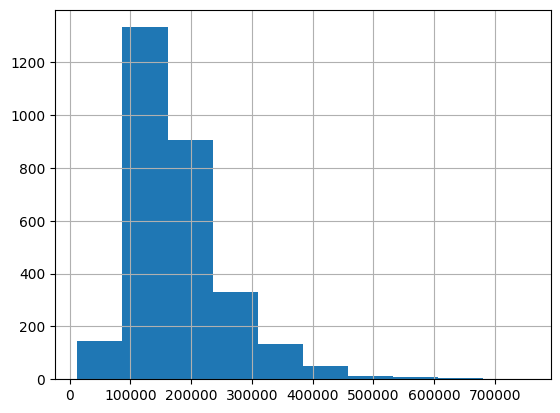

In [74]:
df['SalePrice'].hist()

In [75]:
# sns.clustermap(df.corr())

In [76]:
# ProfileReport(df).to_file(output_file='report.html')

In [77]:
X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']

# Solit/train data

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=12)
len(X), len(X_train), len(X_test)

(2930, 2197, 733)

# Constance model - model stały, gdzie nic nie robimy

In [79]:
Y_pred_const = np.full(Y_test.shape, Y_train.mean())
Y_pred_const[:3]

array([180478.50842057, 180478.50842057, 180478.50842057])

In [80]:
np.sqrt(mean_squared_error(Y_test, Y_pred_const))

84752.03982933359

In [81]:
r2_score(Y_test, Y_pred_const)

-0.00022436398351999287

/home/lukas/data/Projects/AI/first/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lukas/data/Projects/AI/first/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


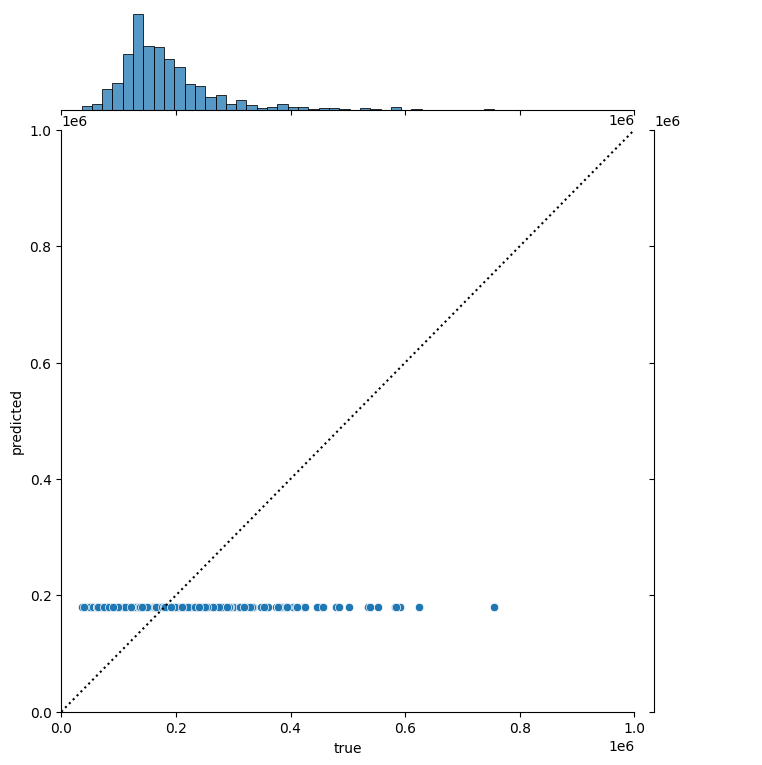

In [82]:
def plot_predictions(Y_true, Y_predicted):
    df_pred = pd.DataFrame({'true': Y_true, 'predicted': Y_predicted})
    val_min = 0
    val_max = 1000000
    # figure = sns.jointplot(df_pred, x='true', y='predicted', 
    #                 xlim=(val_min, val_max),
    #                 ylim=(val_min, val_max))
    figure = sns.jointplot(df_pred, x='true', y='predicted',
                                              xlim=(val_min, val_max),
                    ylim=(val_min, val_max))
    figure.ax_joint.plot([val_min, val_max], [val_min, val_max], ':k')
    figure.fig.set_figheight(8)
    figure.fig.set_figwidth(8)

plot_predictions(Y_test, Y_pred_const)

# LightGBM

In [83]:
lgb_model = lgb.LGBMRegressor(random_state=12)
lgb_model.fit(X_train, Y_train)
Y_pred_lgb = lgb_model.predict(X_test)

ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: MS Zoning: object, Street: object, Alley: object, Lot Shape: object, Land Contour: object, Utilities: object, Lot Config: object, Land Slope: object, Neighborhood: object, Condition 1: object, Condition 2: object, Bldg Type: object, House Style: object, Roof Style: object, Roof Matl: object, Exterior 1st: object, Exterior 2nd: object, Mas Vnr Type: object, Exter Qual: object, Exter Cond: object, Foundation: object, Bsmt Qual: object, Bsmt Cond: object, Bsmt Exposure: object, BsmtFin Type 1: object, BsmtFin Type 2: object, Heating: object, Heating QC: object, Central Air: object, Electrical: object, Kitchen Qual: object, Functional: object, Fireplace Qu: object, Garage Type: object, Garage Finish: object, Garage Qual: object, Garage Cond: object, Paved Drive: object, Pool QC: object, Fence: object, Misc Feature: object, Sale Type: object, Sale Condition: object

In [ ]:
np.sqrt(mean_squared_error(Y_test, Y_pred_lgb))

In [ ]:
r2_score(Y_test, Y_pred_lgb)

In [ ]:
plot_predictions(Y_test, Y_pred_lgb)